In [1]:
import sys

import importlib
sys.path.append('../src')
sys.path.append("../legacy")

from sklearn.datasets import load_iris, load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from zadu import zadu
from zadu.measures import steadiness_cohesiveness
from zaduvis import zaduvis

import matplotlib.pyplot as plt


importlib.reload(zadu)
importlib.reload(zaduvis)
importlib.reload(steadiness_cohesiveness)





<module 'zadu.measures.steadiness_cohesiveness' from '/ssd3/hj/zadu/test/../src/zadu/measures/steadiness_cohesiveness.py'>

### Dataset Generation

In [2]:
digits, digits_label = load_digits(return_X_y=True)

pca = PCA(n_components=2)

digits_pca = pca.fit_transform(digits)

digits_tsne = TSNE(n_components=2).fit_transform(digits)


/home/hj/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/hj/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### Running ZADU

In [3]:
spec_list = [
  {
    "measure": "tnc",
    "params": {
			"k": 25
		}
	},
  {
    "measure": "snc",
		"params": {
			"k": 50
		}       
	},
]


zadu_obj = zadu.ZADU(spec_list, digits, return_local=True)
scores, local_list = zadu_obj.measure(digits_tsne, digits_label)

trust_conti_local = local_list[0]
stead_cohev_local = local_list[1]




In [4]:

import numpy as np
print(np.array(stead_cohev_local["local_steadiness"]))

[0.99616501 0.99523344 0.92593402 ... 0.92067326 0.95752072 0.97735106]


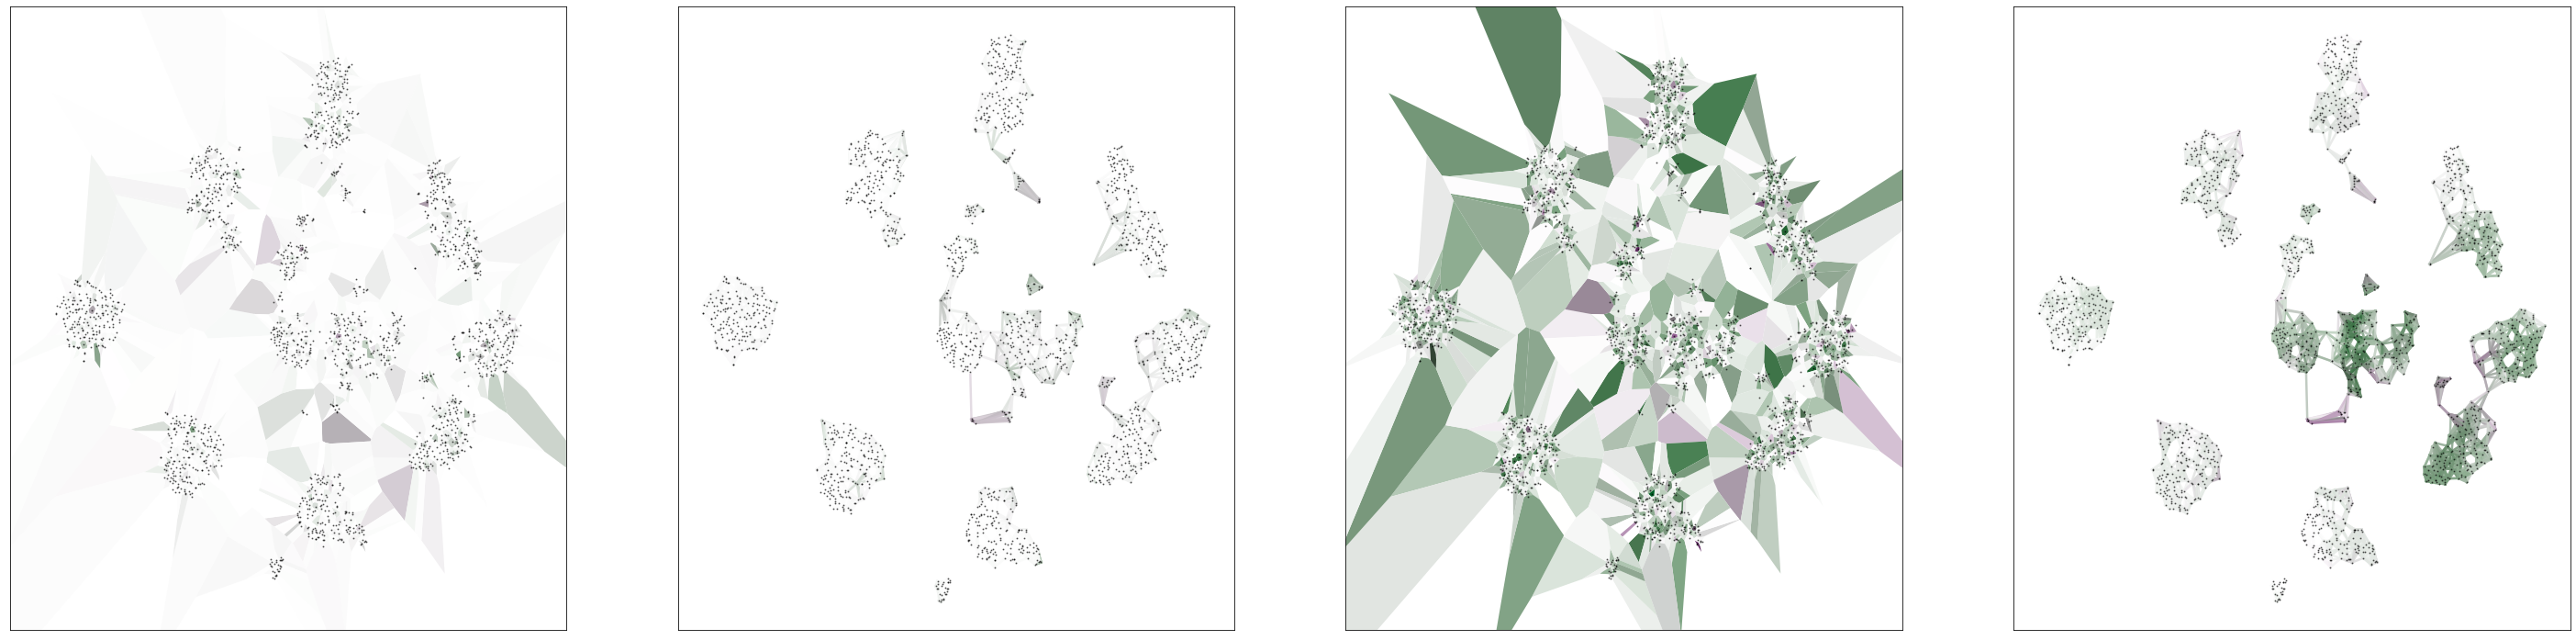

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(50, 12.5))

zaduvis.checkviz(digits_tsne, trust_conti_local["local_trustworthiness"], trust_conti_local["local_continuity"], ax=ax[0])
zaduvis.reliability_map(digits_tsne, trust_conti_local["local_trustworthiness"], trust_conti_local["local_continuity"], k=10, ax=ax[1])

zaduvis.checkviz(digits_tsne, stead_cohev_local["local_steadiness"], stead_cohev_local["local_cohesiveness"], ax=ax[2])
zaduvis.reliability_map(digits_tsne, stead_cohev_local["local_steadiness"], stead_cohev_local["local_cohesiveness"], k=10, ax=ax[3])

In [2]:
import umato
import umap 

## load mnist test dataset using sklearn
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)

labels = mnist.target.astype(int)
data = mnist.data

data = data[::7]
labels = labels[::7]


/home/hj/anaconda3/envs/zadutest/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pacmap

umap_data = umap.UMAP(n_components=2).fit_transform(data)
densmap_data = umap.UMAP(n_components=2, densmap=True).fit_transform(data)
pacmap_data = pacmap.PaCMAP(n_components=2).fit_transform(data)

In [22]:
import matplotlib.pyplot as plt 



umato_data = umato.UMATO(n_components=2, n_neighbors=100, hub_num=300, init="pca").fit_transform(data)



Text(0.5, 1.0, 'UMATO')

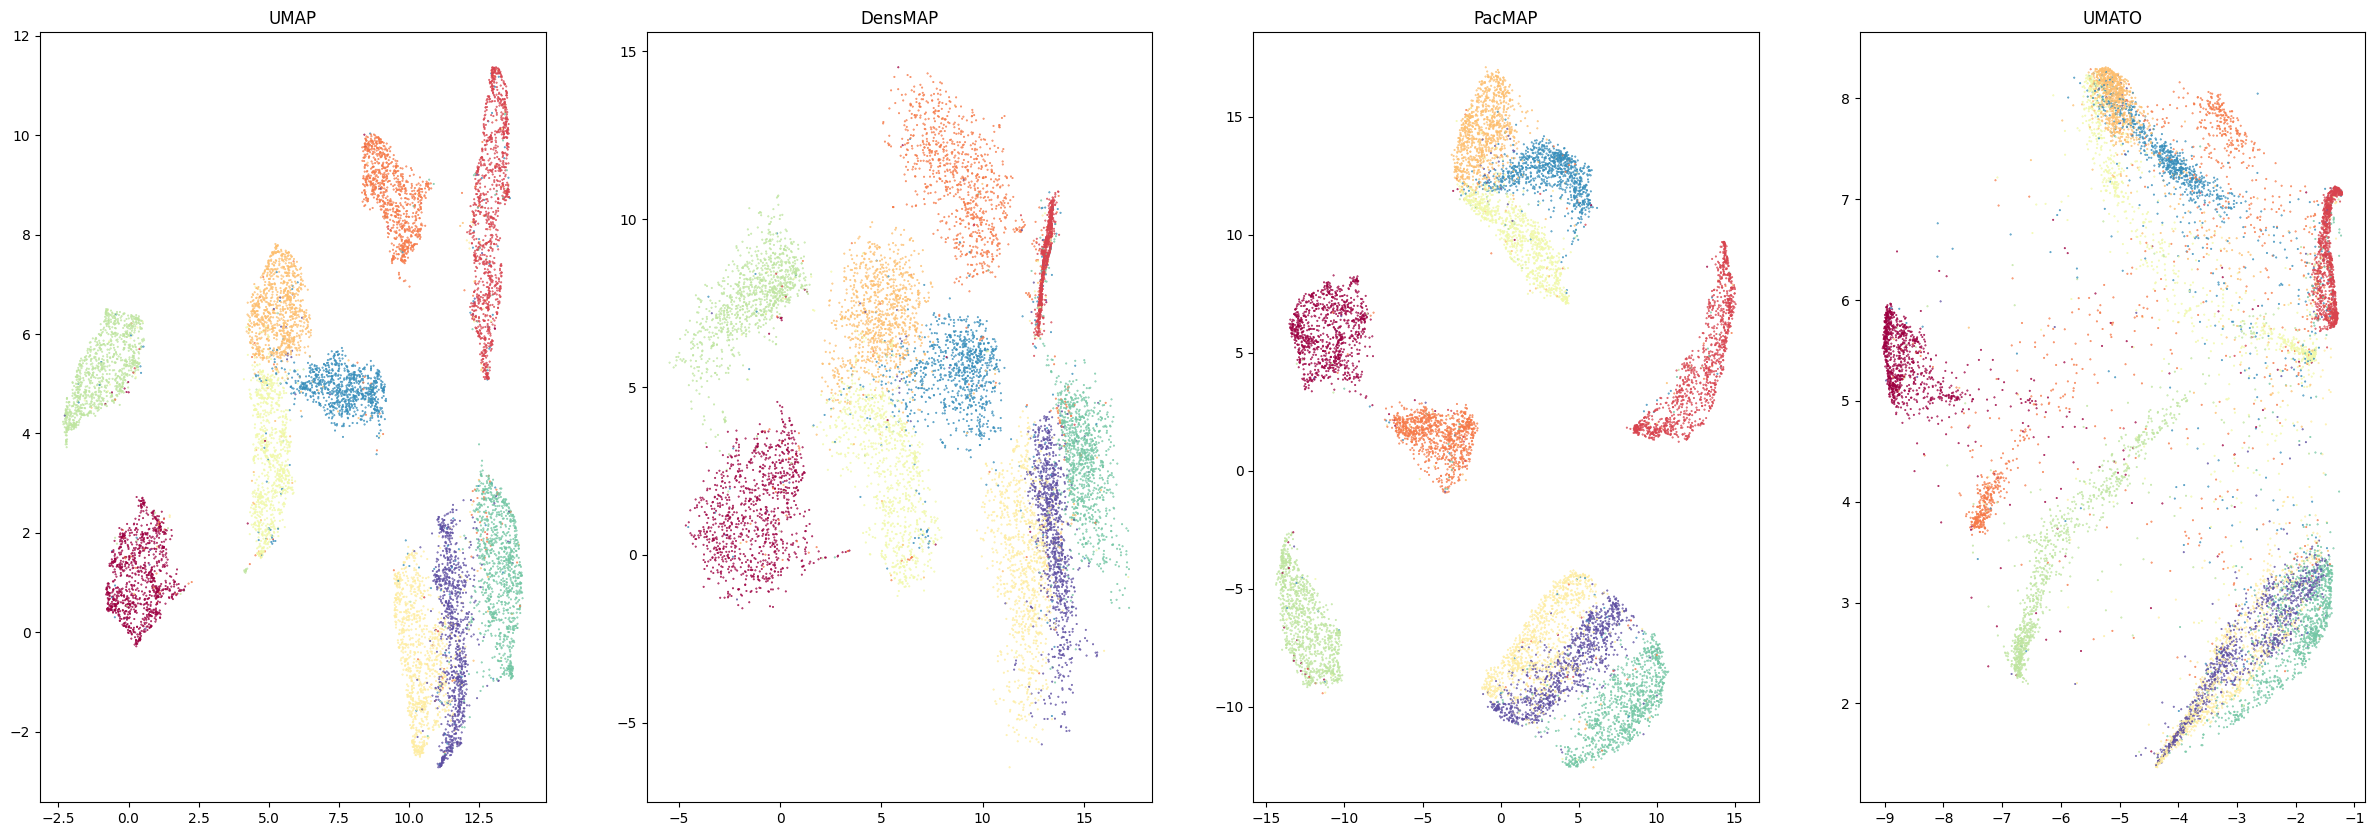

In [25]:
## flip umato in x axis
umato_data[:, 0] = -umato_data[:, 0]
umato_data[:, 1] = -umato_data[:, 1]

fig, ax = plt.subplots(1, 4, figsize=(30, 10))

ax[0].scatter(umap_data[:, 0], umap_data[:, 1], c=labels, s=0.2, cmap='Spectral')
ax[0].set_title("UMAP")

ax[1].scatter(densmap_data[:, 0], densmap_data[:, 1], c=labels, s=0.2, cmap='Spectral')
ax[1].set_title("DensMAP")

ax[2].scatter(pacmap_data[:, 0], pacmap_data[:, 1], c=labels, s=0.2, cmap='Spectral')
ax[2].set_title("PacMAP")

ax[3].scatter(umato_data[:, 0], umato_data[:, 1], c=labels, s=0.2, cmap='Spectral')
ax[3].set_title("UMATO")

In [ ]:
spec_list = [
  {
    "measure": "snc",
		"params": {
			"k": 50
		}       
	},
]

zadu_obj = zadu.ZADU(spec_list, data, return_local=True)

umap_score, umap_local = zadu_obj.measure(umap_data, labels)
densmap_score, densmap_local = zadu_obj.measure(densmap_data, labels)
pacmap_score, pacmap_local = zadu_obj.measure(pacmap_data, labels)


In [24]:
umato_score, umato_local = zadu_obj.measure(umato_data, labels)

print("umap:", umap_score)
print("densmap:", densmap_score)
print("pacmap:", pacmap_score)
print("umato:", umato_score)

umap: [{'steadiness': 0.762234411062006, 'cohesiveness': 0.919881184810646}]
densmap: [{'steadiness': 0.6987265747217137, 'cohesiveness': 0.9305799976950561}]
pacmap: [{'steadiness': 0.7359969424004578, 'cohesiveness': 0.9221228856534052}]
umato: [{'steadiness': 0.6881145602969128, 'cohesiveness': 0.8846375260743836}]


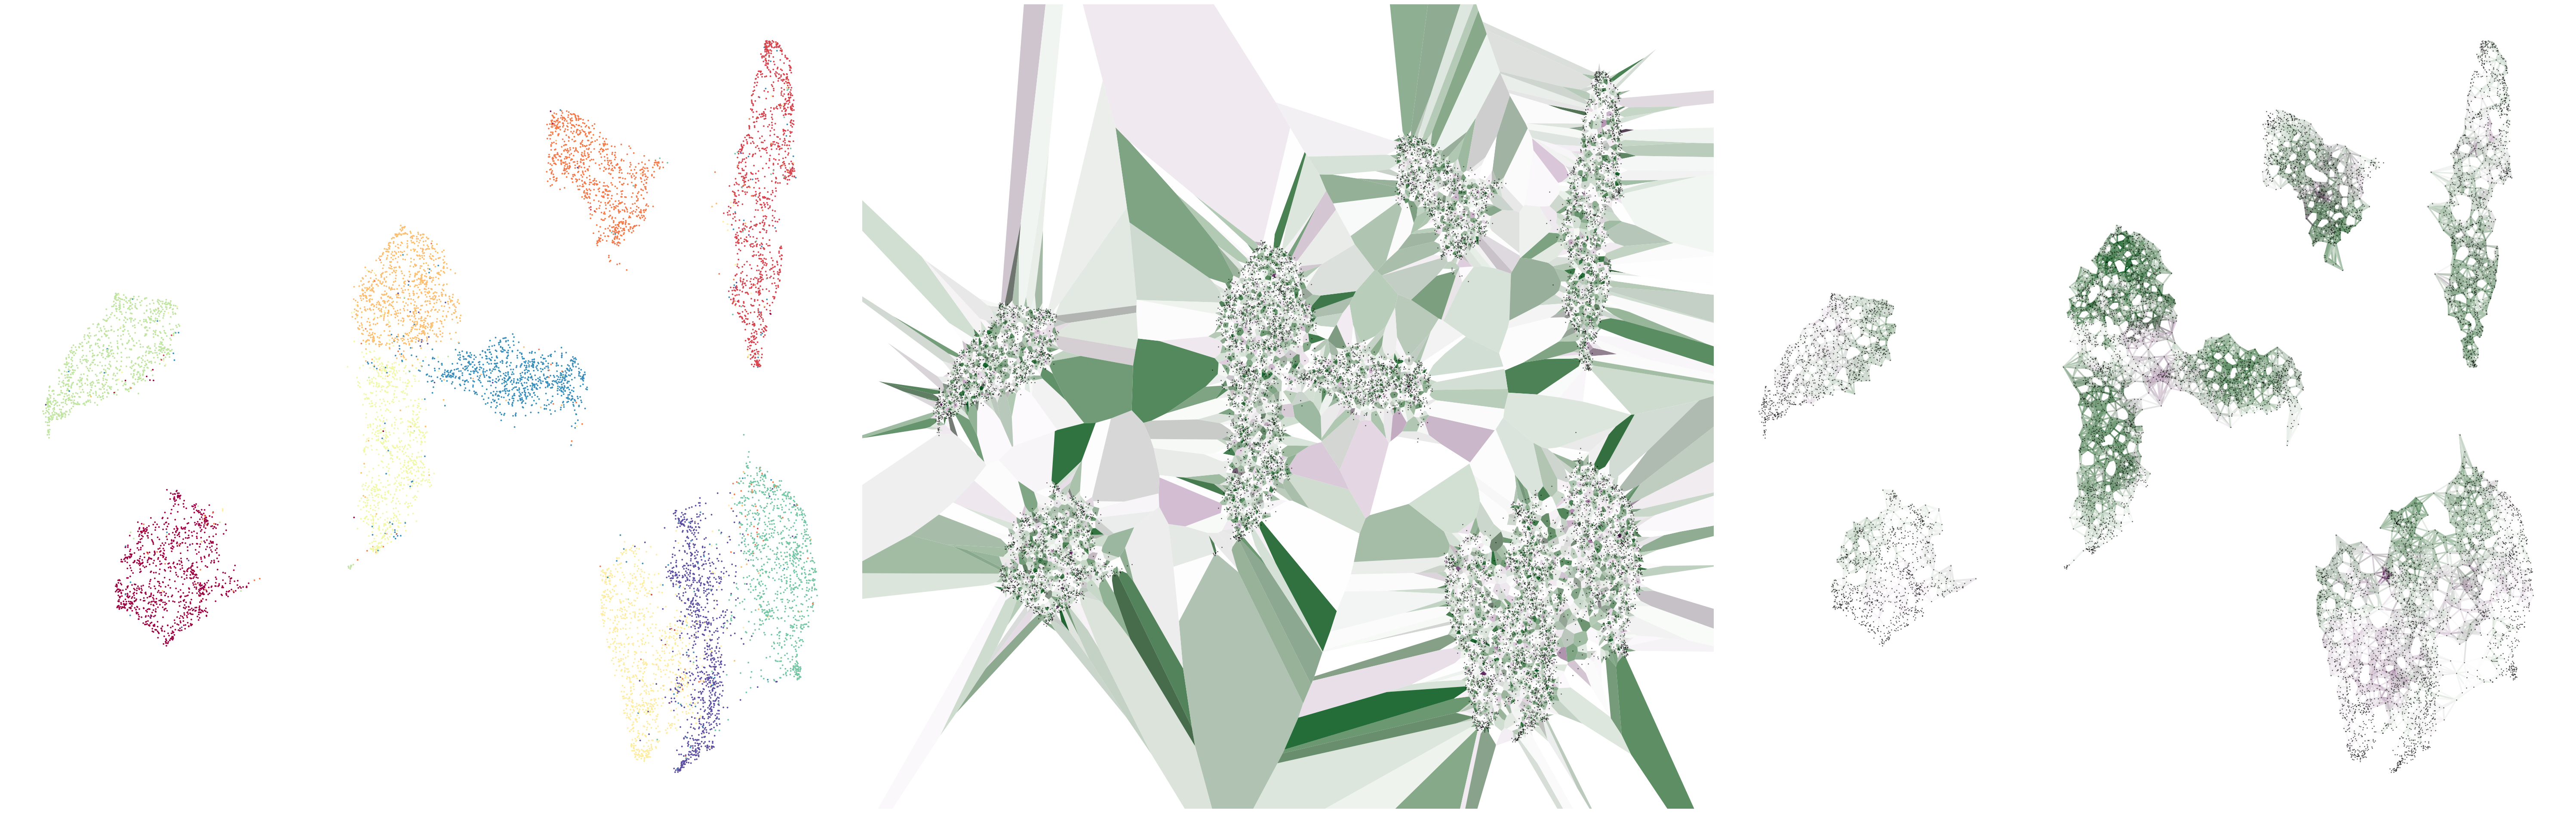

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(60, 19))

# umap_local = umap_local[0]
# densmap_local = densmap_local[0]
# pacmap_local = pacmap_local[0]
# umato_local = umato_local[0]

zaduvis.checkviz(umap_data, umap_local["local_steadiness"], umap_local["local_cohesiveness"], ax=ax[1])
zaduvis.reliability_map(umap_data, umap_local["local_steadiness"], umap_local["local_cohesiveness"], k=10, ax=ax[2])

# zaduvis.checkviz(densmap_data, densmap_local["local_steadiness"], densmap_local["local_cohesiveness"], ax=ax[4])
# zaduvis.reliability_map(densmap_data, densmap_local["local_steadiness"], densmap_local["local_cohesiveness"], k=10, ax=ax[5])
# zaduvis.reliability_map(pacmap_data, pacmap_local["local_steadiness"], pacmap_local["local_cohesiveness"], k=10, ax=ax[1, 2])
# zaduvis.reliability_map(umato_data, umato_local["local_steadiness"], umato_local["local_cohesiveness"], k=10, ax=ax[1, 3])

ax[0].scatter(umap_data[:, 0], umap_data[:, 1], c=labels, s=3, cmap='Spectral')



# ax[3].scatter(densmap_data[:, 0], densmap_data[:, 1], c=labels, s=3, cmap='Spectral')


for i in range(3):
	## remove ticks
	ax[i].set_xticks([])
	ax[i].set_yticks([])
	ax[i].set_xlabel("")
	ax[i].set_ylabel("")
	## remove border
	ax[i].spines['top'].set_visible(False)
	ax[i].spines['right'].set_visible(False)
	ax[i].spines['bottom'].set_visible(False)
	ax[i].spines['left'].set_visible(False)


plt.tight_layout()

In [ ]:
plt.savefig("./figure/zaduvis.png", dpi=300)
plt.savefig("./figure/zaduvis.pdf", dpi=300)